# SUPPORT VECTOR MACHINE 

_Iqra_: Hello, Brother Ladle! can you explain the Support Vector Machine?

_Ladle_: Of course, Iqra! But if you answer my questions, I will explain them to you.

_Iqra_: Okay, Bro, I will try my best. 

_Ladle_: First, tell me, **is SVM Regression or Classification?**

_Iqra_: Maybe it's Regression.

_Ladl_: No, **it's both Regression & Classification.**

_Iqra_: How??

_Ladle_: Support Vector Machine is the most popular Supervised Learning algorithm for Classification and Regression problems. It can solve linear and non-linear problems and work well for many practical problems. 

_Iqra_: Bro, **what the goal of this is?**

_Ladle_: The goal of SVM, _The objective of applying SVMs, is to find the best line in two dimensions or the best Hyperplane in more than two dimensions to help us separate our space into classes._ 

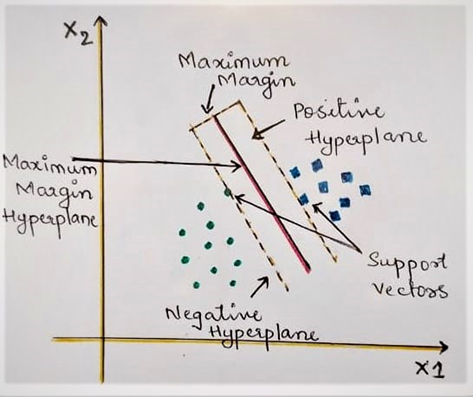

In this, we are classifying the data, **making two parallel lines called Support Vectors(Marginal Plane)** & **our best fit line called the Hyperplane.**

_Iqra_: Brother, can you define **what Hyperplane and Support Vector are?**

_Ladle_: Okay!

**Hyperplane**: _We always create a hyperplane with a maximum margin, which means the maximum distance between the data points._

**Support vector**: _The data points or vectors closest to the Hyperplane and affecting the Hyperplane's position is termed Support Vector. Since these vectors support the Hyperplane, hence called a Support vector._

_Ladle_: Do you know the **types of SVM?**

_Iqra_: Yes, Brother. SVM can be of **two types:**

**LINEAR SVM**: _Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed linearly separable data, and classifier is used called Linear SVM classifier._

**NON-LINEAR SVM**: _Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed non-linear data, and the classifier used is called a Non-linear SVM classify the dimensions of the hyperplane depend on the features present in the dataset, which means if there are two features , then hyperplane will be a straight line. And if there are three features, then the hyperplane will be a 2-dimension plane._

But Bro! can you **elaborate more on this type?**

Ladle: Good, Iqra! Let me show you how it works.

**LINEAR SVM**: The working of the SVM algorithm can be understood by using an example. Suppose we have a dataset that has two tags **(green and blue)**, and the dataset has **two features, x1 and x2**. We want a classifier to **classify the pair(x1, x2) of coordinates in either green or blue.**
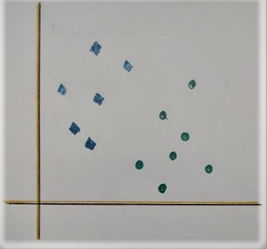
Consider the below image: As it is a **2-d space**, _we can easily separate these two classes by just using a straight line. But there can be multiple lines that can separate these classes_. Consider the below image:  
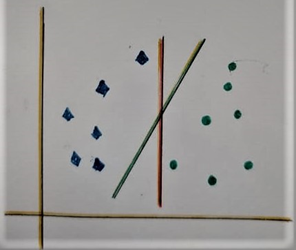
Hence, _the SVM algorithm helps to find the best line or decision boundary. The hyperplane and support vector, the distance between these two, is called the margin. And the goal of SVM is to maximize this margin. Therefore, the hyperplane with the maximum margin is called the optimal hyperplane._ 

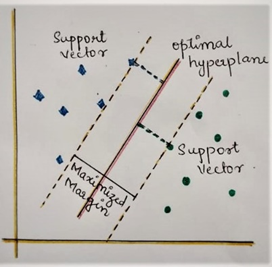

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [2]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

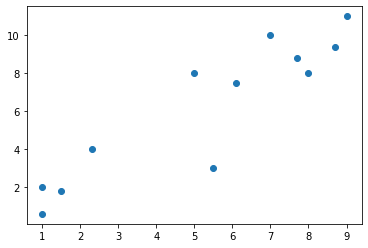

In [3]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [4]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [5]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

In [6]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

No handles with labels found to put in legend.


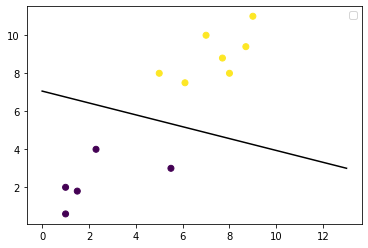

In [7]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()


_Iqra_: So, it means **SVM works differently for both types. Continue Brother for non-linear SVM.**

Ladle: Yep!

**Non-Linear SVM**:
_If data is linearly arranged, we can separate it using a straight line, but for non-linear data, we cannot draw a single straight line._
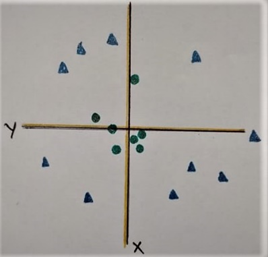
So to separate these data points, we need to add one more dimension.
- _We have used two dimensions, x, and y, so for non-linear data, we will add a third dimension, z. It can be calculated as z=x2 +y2. By adding the third dimension_, the sample space will become as below image:
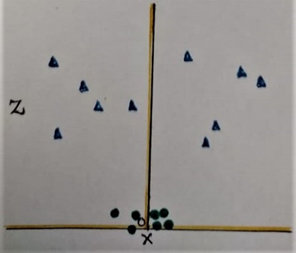
So now, SVM will divide the datasets into classes in the following way.
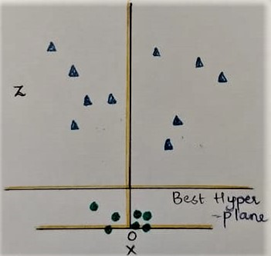

 _Since we are in 3-d Space, it looks like a plane parallel to the x-axis. If we convert it in 2d Space with z=1, it will become: image-4.png Hence we get a circumference of radius 1 in case of non-linear data._
 


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [9]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

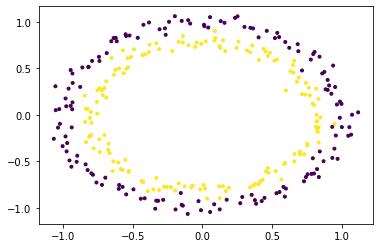

In [10]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [11]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [12]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [13]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

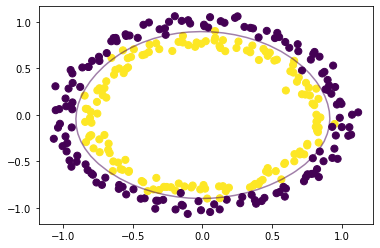

In [14]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

_Iqra_: **What about data points are not linearly separable?** 

_Ladle_: Good Iqra!! 

**SVM has a technique called the Kernel Trick.** _These functions take low-dimensional input space and transform it into a higher-dimensional space, i.e., it converts not separable problem to separable problem. It is primarily helpful in non-linear separation problems._





**Mapping to a Higher Dimension:**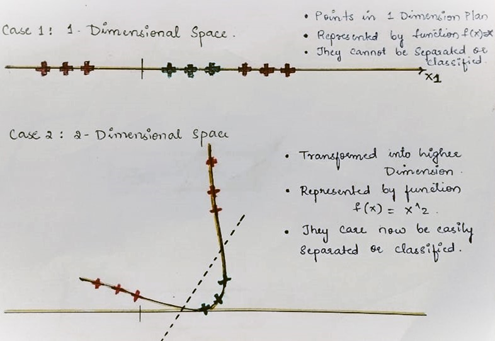


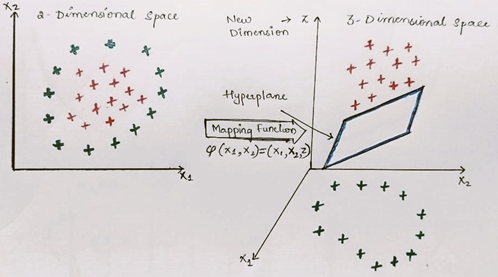

_Ladle_: _Some Frequently Used Kernels:_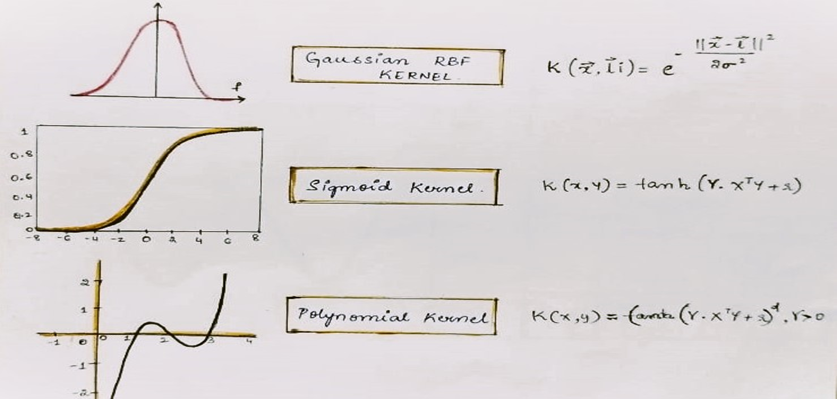

_Ladle_: **Do you know about Soft Margin & Hard Margin?**

_Iqra_: Yes, Bro!,

 - Hard margin SVM does not allow any misclassification to happen.
_If our data is non-separable/ nonlinear, then the Hard margin SVM will not return any hyperplane as it will not be able to separate the data. Hence this is where Soft Margin SVM comes to the rescue._

**max(w) { 2/||w|| }**

- Soft margin SVM allows some misclassification to happen by relaxing the hard constraints of the Support Vector Machine.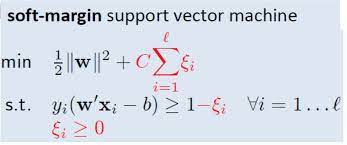

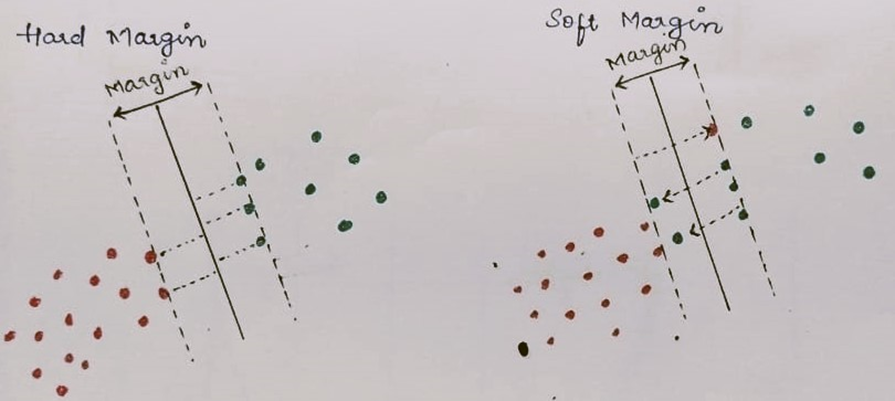

_Iqra_: Bro, **what is the mathematical intuition behind the maximizing margin?**

_Ladle_: Excellent question Iqra!,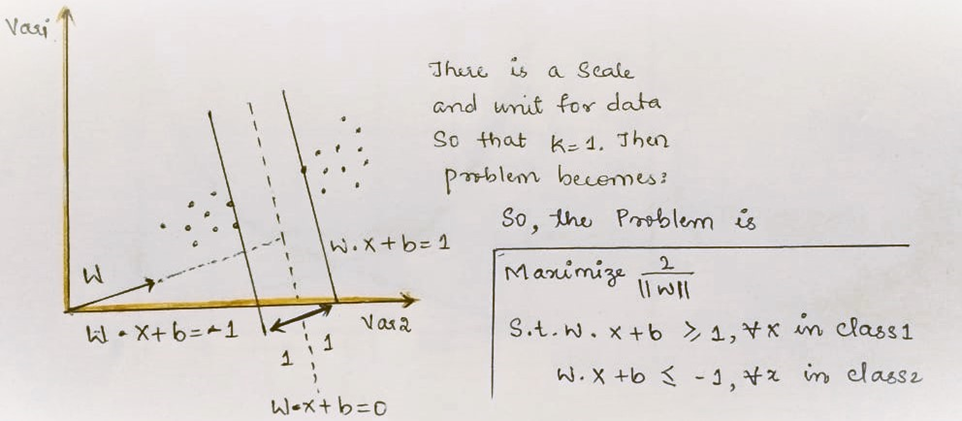
  
  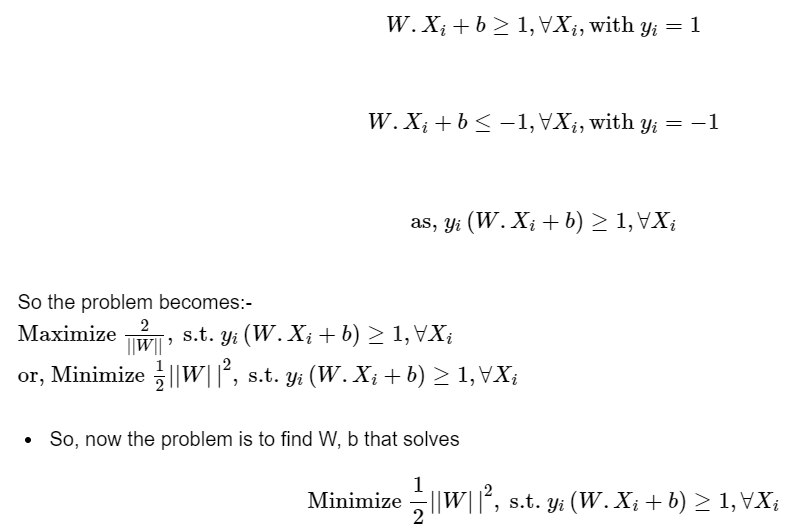
  
  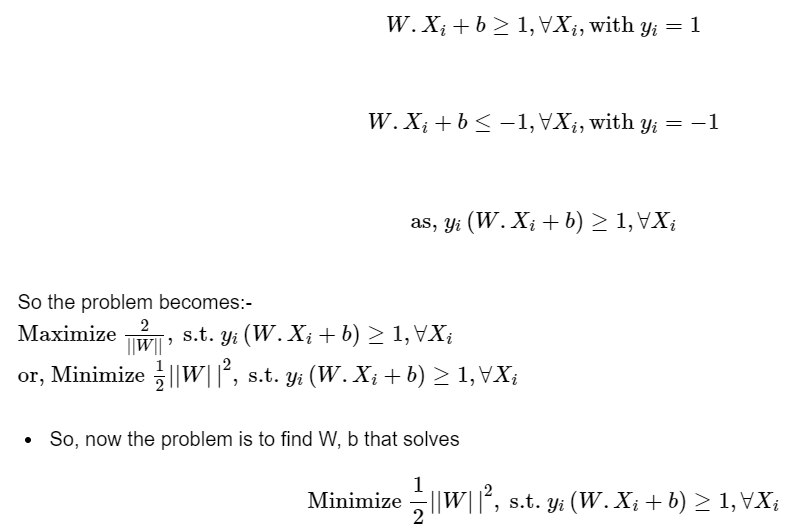

_Iqra_: Thank you, Bro!! **What is Gradient Descent?** 

_Ladle_: Okay!! 
  To **minimize a cost function C(w)**, use the iterative update.

**wt+1 ← wt − ηt∇wC(wt)**
where _η is the learning rate_.

First, rewrite the optimization problem as an average.

**minwC(w) =λ2||w||2+1NXNimax(0, 1−yif(xi))**

**=1NXNiµλ2||w||2 + max(0, 1−yif(xi))¶(withλ** 

**= 2/(NC)** up to an overall scale of the problem) and

**f(x)=w>x+b**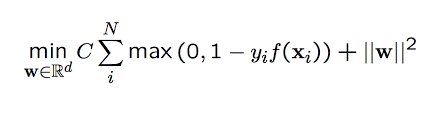

_Iqra_: I need to learn in-depth then only get these points.

_Ladle_: Yes Iqra!.

_Iqra_: Let's move to **SV Regression**.

_Ladle_: Sure!
   
   **Support Vector Regression:**
        _Support Vector Regression is used for the regression problems where we predict the target values using the SVR. The way we have a mathematical formulation of SVM we have some mathematical forms in SVR too!!_
        
  **Mathematical Formulation:**
The optimization problem will remain the same here also :
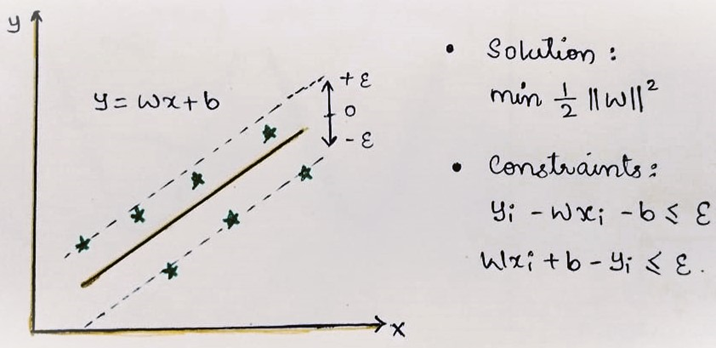
_The solution to the above problem will give the optimal w*, and in the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM._

_Iqra_: Bro!, **Why we use SVM?**  

_Ladle_: Look!
1.    Solve the data points are not linearly separable
2.    Effective in a higher dimension.
3.    Suitable for small data sets: effective when the number of features is more than training examples.
4.    Overfitting problem: The hyperplane is affected by only the support vectors, so SVMs are not robust to the outliner.


_Iqra_: But Bro!!, **What is the difference between SVM and Logistic Regression??**

_Ladle_: Excellent observation Iqra!  Let's see,
       
- SVM tries to find the "best" margin that separates the classes, reducing the risk of error on the data, while logistic regression does not; instead, it can have different decision boundaries with different weights near the optimal point.

- SVM works well with unstructured and semi-structured data like text and images, while logistic regression works with identified independent variables.

- SVM is based on the geometrical properties of the data, while logistic regression is based on statistical approaches.

- The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting..

_Iqra_: Oooh!! Now I got It, Bro! 

**What are the Advaantages & Disadvantages of SVM?** 


_Ladle:_ Advantages:
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where the number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient

Disadvantages:

- SVM algorithm is not suitable for large data sets.
- SVM does not perform very well when the data set has more noise.


_Ladle_: Any other queries??

_Iqra_: One last, Bro! **When to use Logistic Regression vs. Support Vector Machine?**

_Ladle_:  No problem, Iqra. It would help if you asked anything regarding this. The answer to your question is,
   
   
   _Depending on the number of training sets (data)/features, you can use either logistic regression or a support vector machine._
Let us take these as an example where :
**n = number of features,
m = number of training examples**

1. If n is large (1–10,000) and m is small (10–1000): use logistic regression or SVM with a linear kernel.
2. If n is small (1–10 00) and m is intermediate (10–10,000): use SVM with (Gaussian, polynomial, etc.) kernel
3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel
_Generally, it is usually advisable to first try to use logistic regression to see how the model does. Then, if it fails, you can try using SVM without a kernel (otherwise known as SVM with a linear kernel). Logistic regression and SVM with a linear kernel have similar performance, but depending on your features, one may be more efficient than the other._

_Iqra_: Thank you so much, Bro Ladle. It means a lot.